In [1]:
import numpy as np
import pandas as pd
import os
import datetime

In [2]:
INPUT_SHAPE = (1, 256)

In [3]:
data_path = '{}\\data\\jobdata.xlsx'.format( os.path.abspath('.') )
print(data_path)

d:\Files\PDF\MTECH\Sem 3\Data\data\jobdata.xlsx


In [4]:
df = pd.read_excel(data_path)

df.head(5)

,Timestamp,First Name,Middle Name (Optional),Last Name,Gender,Age,Email,Phone,City,Highest Qualification,Passing Year,Highest Qualification %,Current Company,Total Work Experience (Years),Skills,Institution Name,Upload Resume
0,2023-01-01 08:00 AM,Ronny,M,Doe,Male,28,ronny.doe@email.com,+1 123 456 7890,New York,B.Sc. Computer Science,2018,85.0,ABC Corp,5.0,"Programming, Data Analysis, Teamwork ...",University of XYZ,NaN
1,2023-01-02 09:30 AM,Jane,,Smith,Female,35,jane.smith@email.com,+1 987 654 3210,Los Angeles,M.Tech. Electronics,2015,92.0,XYZ Tech Solutions,8.0,"Communication, Project Management ...",Institute of Technology,NaN
2,2023-01-03 11:45 AM,Alex,J,Brown,Male,24,alex.brown@email.com,+1 555 123 4567,Chicago,B.A. Psychology,2020,78.0,Delta Corporation,3.0,"Counseling, Research, Problem Solving ...",City College,NaN
3,2023-01-04 01:15 PM,Sarah,,Johnson,Female,30,sarah.johnson@email.com,+1 333 999 8888,San Francisco,Ph.D. Computer Engineering,2012,95.0,Tech Innovators,12.0,"Machine Learning, Software Development ...",University of ABC,NaN
4,2023-01-05 02:45 PM,Michael,A,White,Male,40,michael.white@email.com,+1 777 555 1234,Seattle,MBA,2010,88.0,Global Solutions,15.0,"Leadership, Strategic Planning",Business School,NaN


In [5]:
df.describe()

,Age,Highest Qualification %,Total Work Experience (Years)
count,63.000000,63.000000,63.000000
mean,28.825397,83.993651,5.073016
std,3.508238,8.147885,2.940935
min,24.000000,60.000000,1.000000
25%,26.000000,80.000000,3.000000
50%,28.000000,86.000000,5.000000
75%,31.000000,89.000000,6.500000
max,40.000000,95.000000,15.000000


In [6]:
df.columns

Index(['Timestamp', 'First Name', 'Middle Name (Optional)', 'Last Name',
       'Gender', 'Age', 'Email', 'Phone', 'City', 'Highest Qualification',
       'Passing Year', 'Highest Qualification %', 'Current Company',
       'Total Work Experience (Years)', 'Skills', 'Institution Name',
       'Upload Resume'],
      dtype='object')

In [7]:
# def clean_data(df):
#     df.drop(columns=['Timestamp', 'First Name', 'Middle Name (Optional)', 'Last Name', 'Email', 'Phone', 'Institution Name', 'Upload Resume'], inplace=True)
#     # Convert text to uppercase in column: 'Highest Qualification'
#     # also get the first character and produce category of bachelor, master or other
#     df['Highest Qualification'] = df['Highest Qualification'].str.slice(0,1,1).str.upper()
#     # One-hot encode column: 'Highest Qualification'
#     df = pd.get_dummies(df, columns=['Highest Qualification'])
    
#     # Replace missing values with "Freelance" in column: 'Current Company'
#     df = df.fillna({'Current Company': "Freelance"})
#     df['Highest Qualification %'] = df['Highest Qualification %']/100
#     # Get only years
#     df['Year'] = [ datetime.datetime.date(d).year for d in df['Passing Year'] ]
    
#     # drop original column
#     df.drop(columns=['Passing Year'], inplace=True)
    
#     # find year gap, if year is less than cur year, then find year else 0
#     cur_year = datetime.datetime.today().year
    
#     df['Year'] = [ float(max(0, cur_year - y)) for y in df['Year'] ]
    
#     # use comapany as target for deciding person was hired or not
    
#     df['output'] = [ 0 if item == 'Freelance' else 1 for item in df['Current Company'] ]
    
#     df.drop(columns=['Current Company'], inplace=True)
#     # Convert text to lowercase in column: 'Skills'
#     df['Skills'] = df['Skills'].str.lower()
#     # Replace all instances of " " with "" in column: 'Skills'
#     df['Skills'] = df['Skills'].str.replace(" ", "", case=False, regex=False)
#     df['skill_count'] = [ len(skills.split(',')) for skills in df['Skills'] ]
#     # Multi-label encode column 'Skills' using delimiter ','
#     loc_0 = df.columns.get_loc('Skills')
#     df_encoded = df['Skills'].str.get_dummies(sep=',').add_prefix('skill_')
#     df = pd.concat([df.iloc[:,:loc_0], df_encoded, df.iloc[:,loc_0+1:]], axis=1)
#     df.drop(columns=['Gender', 'City'], inplace=True)
#     # Rename column 'Total Work Experience (Years)' to 'Exp'
#     df = df.rename(columns={'Total Work Experience (Years)': 'Exp'})
#     # Round column 'Exp' (Number of decimals: 0)
#     df = df.round({'Exp': 0})
#     # above 18
#     df['Age'] = abs(df['Age']-18)
#     return df

# df_clean = clean_data(df.copy())
# df_clean.head()

In [8]:
import datetime
import pandas as pd

def clean_data(df):
    df.drop(columns=['Timestamp', 'First Name', 'Middle Name (Optional)', 'Last Name', 'Email', 'Phone', 'Institution Name', 'Upload Resume'], inplace=True)
    # Convert text to uppercase in column: 'Highest Qualification'
    # also get the first character and produce category of bachelor, master or other
    # df['Highest Qualification'] = df['Highest Qualification'].str.strip()
    
    df['Highest Qualification'] = df['Highest Qualification'].str.strip().str.slice(0,1,1).str.upper()
    # One-hot encode column: 'Highest Qualification'
    df = pd.get_dummies(df, columns=['Highest Qualification'])
    df['Highest Qualification_B'] = [ 1. if item else 0. for item in df['Highest Qualification_B'] ]
    
    df['Highest Qualification_M'] = [ 1. if item else 0. for item in df['Highest Qualification_M'] ]
    
    df['Highest Qualification_P'] = [ 1. if item else 0. for item in df['Highest Qualification_P'] ]
    # One-hot encode column: 'Gender'
    df['Gender'] = [ item.strip() for item in df['Gender']]
    
    df = pd.get_dummies(df, columns=['Gender'])
    
    # df['Gender'] = [ 1. if item.strip() == 'Male' else 0. for item in df['Gender']]
    
    df['Gender_Female'] = [1. if item else 0. for item in df['Gender_Female']]
    
    df['Gender_Male'] = [1. if item else 0. for item in df['Gender_Male']]
    # Rename column 'Current Company' to 'output'
    df = df.rename(columns={'Current Company': 'output'})
    df['output'] = [ 0. if item == 'Freelance' else 1. for item in df['output'] ]
    df['Highest Qualification %'] = df['Highest Qualification %']/100
    # Get only years
    # df['Year'] = [ datetime.datetime.date(d).year for d in df['Passing Year'] ]
    
    # # drop original column
    # df.drop(columns=['Passing Year'], inplace=True)
    
    # # find year gap, if year is less than cur year, then find year else 0
    # cur_year = datetime.datetime.today().year
    
    # df['Year'] = [ float(max(0, cur_year - y)) for y in df['Year'] ]
    
    df['Year'] = [ int(item.strip()[-4:]) for item in df['Passing Year'] ]
    
    df.drop(columns=['Passing Year'], inplace=True)
    
    cur_year = datetime.datetime.today().year
    
    df['Year'] = [ float(max(0, cur_year - y)) for y in df['Year'] ]
    # Convert text to lowercase in column: 'Skills'
    df['Skills'] = df['Skills'].str.lower().str.strip()
    
    df['Skills'] = df['Skills'].str.replace(" ", "", case=False, regex=False)
    
    df['skill_count'] = [ len(skills.split(',')) for skills in df['Skills'] ]
    # above 18
    df['Age'] = abs(df['Age']-float(18))
    df['skill_count'] = [float(item) for item in df['skill_count']]
    df.drop(columns=['City'], inplace=True)
    # Multi-label encode column 'Skills' using delimiter ','
    
    # loc_0 = df.columns.get_loc('Skills')
    # df_encoded = df['Skills'].str.get_dummies(sep=',').add_prefix('Skills_')
    # df = pd.concat([df.iloc[:,:loc_0], df_encoded, df.iloc[:,loc_0+1:]], axis=1)
    df.drop(columns=['Skills'], inplace=True)
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Age,Highest Qualification %,output,Total Work Experience (Years),Highest Qualification_B,Highest Qualification_M,Highest Qualification_P,Gender_Female,Gender_Male,Year,skill_count
0,10.0,0.85,1.0,5.0,1.0,0.0,0.0,0.0,1.0,6.0,3.0
1,17.0,0.92,1.0,8.0,0.0,1.0,0.0,1.0,0.0,9.0,2.0
2,6.0,0.78,1.0,3.0,1.0,0.0,0.0,0.0,1.0,4.0,3.0
3,12.0,0.95,1.0,12.0,0.0,0.0,1.0,1.0,0.0,12.0,2.0
4,22.0,0.88,1.0,15.0,0.0,1.0,0.0,0.0,1.0,14.0,2.0


In [9]:
def transform_data(df):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X = scaler.fit_transform(df)

    return X
    
def split_data(df):
    train_y = df['output']
    trainX = df.drop(columns=['output'])
    transformed_data = transform_data(trainX)

    return transformed_data, train_y
    


In [10]:
df_clean.shape

(63, 11)

In [11]:
train_x, train_y = split_data(df_clean)

In [12]:
# pca = PCA(n_components = df_clean.shape[1])
# pca.fit(X)
# x_pca = pca.transform(X)

# pca_df = pd.DataFrame(data=x_pca)
# pca_df

In [13]:
train_y

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
58    1.0
59    1.0
60    1.0
61    1.0
62    1.0
Name: output, Length: 63, dtype: float64

In [14]:
test_y = train_y

In [15]:
# train_y.shape

In [16]:
# train_x = train_x.to_numpy()
# train_y = train_y.to_numpy()
print(train_x.shape, train_y.shape)

(63, 10) (63,)


In [17]:
train_x = np.asarray(train_x).astype('float32')
train_y = np.asarray(train_y).astype('float32')
print(train_x.shape, train_y.shape)

(63, 10) (63,)


In [18]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y)
print(train_y.shape)


(63, 2)


In [19]:
train_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [20]:
def evaluate_progress(progress):
    import matplotlib.pyplot as plt

    print(progress['accuracy'], progress['loss'])

In [21]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, AveragePooling1D, Activation, MaxPooling1D, UpSampling1D, BatchNormalization, Input, Multiply, Reshape 
from tensorflow.keras.optimizers import SGD, schedules, Adamax, Adam, AdamW,Adafactor, Adadelta, Lion, Adagrad, RMSprop, Ftrl, Nadam
# from tensorflow.keras.optimizers.schedules import 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.activations import 
from tensorflow.keras.losses import Poisson, Reduction

In [109]:
def get_model(trainX, trainY):
    n_features = trainX.shape[1]
    n_outputs = trainY.shape[1]

    inp = Input(shape=(n_features,))
    x = BatchNormalization()(inp)
    # x = Dropout(0.5)(x)
    x = Dense(1024)(x)
    x = Reshape((64, 16))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    
    x = Conv1D(filters=64, kernel_size=5, activation='relu', use_bias=True)(x)
    x = MaxPooling1D(pool_size=2)(x)
    # sl = x
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)
    # x = Conv1D(filters=32, kernel_size=3, activation='relu', use_bias=True, padding='same')(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)
    # x = Conv1D(filters=64, kernel_size=3, activation='tanh', use_bias=True, padding='same')(x)
    # x = Multiply()([x, sl])
    # x = MaxPooling1D(pool_size=4, strides=2)(x)

    # x = Conv1D(filters=64, kernel_size=2, activation='sigmoid', use_bias=True, padding='same')(x)
    # x = Conv1D(filters=64, kernel_size=2, activation='relu')(x)
    # x = MaxPooling1D((2))(x)
    # x = Conv1D(filters=128, kernel_size=2, activation='sigmoid', use_bias=True, padding='same')(x)
    # x = Conv1D(filters=128, kernel_size=2, activation='relu')(x)
    # x = MaxPooling1D((2))(x)
    # x = Conv1D(filters=256, kernel_size=2, activation='tanh' , use_bias=True, padding='same')(x)
    # x = Conv1D(filters=256, kernel_size=2, activation='tanh')(x)
    # x = Conv1D(filters=256, kernel_size=2, activation='tanh')(x)
    # x = MaxPooling1D((2))(x)
    # x = Conv1D(filters=512, kernel_size=2, activation='relu', use_bias=True, padding='same')(x)
    # x = Conv1D(filters=512, kernel_size=2, activation='relu')(x)
    # x = Conv1D(filters=512, kernel_size=2, activation='sigmoid')(x)
    # x = MaxPooling1D((2))(x)
    # x = Conv1D(filters=512, kernel_size=2, activation='sigmoid')(x)
    # x = Conv1D(filters=512, kernel_size=2, activation='sigmoid')(x)
    # x = Conv1D(filters=512, kernel_size=2, activation='sigmoid')(x)
    # x = MaxPooling1D((2))(x)

    x = Flatten()(x)
    x = BatchNormalization()(x)
    x = Dense(1024)(x)
    x = Dropout(0.25)(x)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Activation('relu')(x)
    x = Dense(n_outputs)(x)

    out = Activation('softmax')(x)

    model = Model(inputs=inp, outputs=out)

    # Define a learning rate schedule
    learning_rate_schedule = schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        # end_learning_rate=0.0001,
        decay_steps=5000,
        # power=1,
        decay_rate=0.96,
        # alpha=0.1,
        # warmup_steps=2
    )

    # Create an optimizer with the learning rate schedule
    optimizer = Adamax(learning_rate=learning_rate_schedule)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [110]:
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=1)

early_stop=[earlyStopping]

def train_model(model, trainX, trainY):
    epochs = 100
    batch_size = 64
    verbose = 1
    progress = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, callbacks=earlyStopping, shuffle=True, verbose=verbose, validation_split=.3)

    return progress

In [111]:
model = get_model(trainX=train_x, trainY=train_y)
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 10)]              0         
                                                                 
 batch_normalization_48 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dense_48 (Dense)            (None, 1024)              11264     
                                                                 
 reshape_12 (Reshape)        (None, 64, 16)            0         
                                                                 
 batch_normalization_49 (Ba  (None, 64, 16)            64        
 tchNormalization)                                               
                                                                 
 dropout_36 (Dropout)        (None, 64, 16)            0  

In [112]:
progress = train_model(model=model, trainX=train_x, trainY=train_y)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.0018 - accuracy: 0.5000 - val_loss: 0.6878 - val_accuracy: 0.5789
Epoch 2/100
1/1 [==============================] - 0s 98ms/step - loss: 0.9162 - accuracy: 0.4545 - val_loss: 0.6827 - val_accuracy: 0.4211
Epoch 3/100
1/1 [==============================] - 0s 93ms/step - loss: 0.8249 - accuracy: 0.5455 - val_loss: 0.6800 - val_accuracy: 0.5789
Epoch 4/100
1/1 [==============================] - 0s 69ms/step - loss: 0.8444 - accuracy: 0.5000 - val_loss: 0.6854 - val_accuracy: 0.6316
Epoch 5/100
1/1 [==============================] - 0s 88ms/step - loss: 0.7040 - accuracy: 0.6591 - val_loss: 0.6860 - val_accuracy: 0.6842
Epoch 6/100
1/1 [==============================] - 0s 83ms/step - loss: 0.5796 - accuracy: 0.7500 - val_loss: 0.6786 - val_accuracy: 0.6842
Epoch 7/100
1/1 [==============================] - 0s 85ms/step - loss: 0.5724 - accuracy: 0.8182 - val_loss: 0.6681 - val_accuracy: 0.6842
Epoch 8/100
1/1 [=====

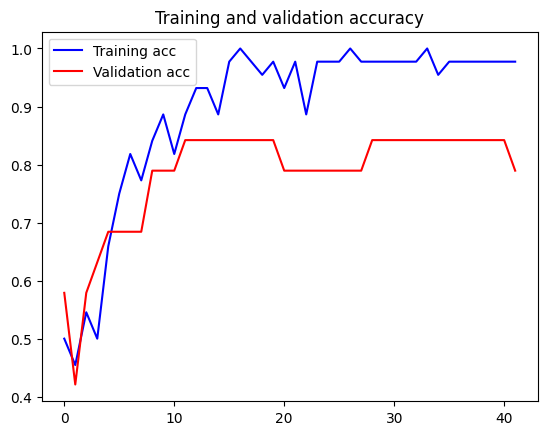

<Figure size 640x480 with 0 Axes>

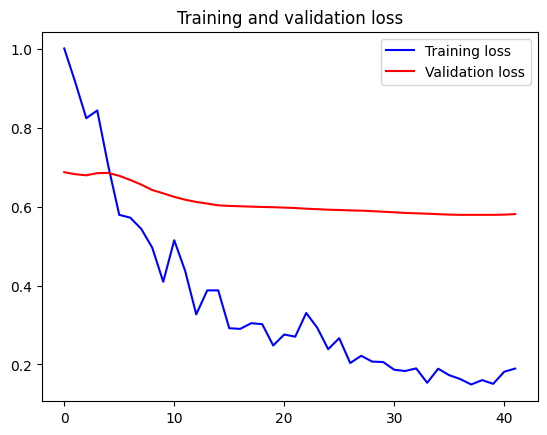

In [113]:
import matplotlib.pyplot as plt
# progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']
# precision = progress.history['precision']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

# plt.plot(epochs, precision, 'b', label='Training Precision')
# plt.title('Training precision')
# plt.legend()
# plt.figure()
# plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [114]:


result = model.predict(train_x)
print([ np.argmax(pair) for pair in result ])
print(result)

2/2 [==============================] - 0s 16ms/step
[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[[0.23524973 0.76475024]
 [0.32523918 0.6747608 ]
 [0.20795383 0.7920462 ]
 [0.39598548 0.6040145 ]
 [0.3624854  0.6375146 ]
 [0.57952416 0.42047587]
 [0.4892911  0.51070887]
 [0.25849867 0.7415014 ]
 [0.3606793  0.63932073]
 [0.5729476  0.42705238]
 [0.45677972 0.5432203 ]
 [0.26721126 0.73278874]
 [0.4238177  0.5761823 ]
 [0.33015016 0.6698499 ]
 [0.44830966 0.55169034]
 [0.32034174 0.67965823]
 [0.40054557 0.5994544 ]
 [0.38119444 0.6188056 ]
 [0.21009146 0.7899086 ]
 [0.31253868 0.6874613 ]
 [0.29070544 0.70929456]
 [0.36683723 0.6331627 ]
 [0.17340517 0.8265949 ]
 [0.42350087 0.57649904]
 [0.4287038  0.57129616]
 [0.26236662 0.7376334 ]
 [0.42601365 0.5739863 ]
 [0.29251766 0.70748234]
 [0.5395021  0.46049786]
 [0.28546453 0.7145355 ]
 [0.4330

In [115]:
out = [ float(np.argmax(pair)) for pair in result ]
preds = [ 1 if o == t else 0 for o,t in zip(out, test_y) ]
predicted = sum(preds)
print(out)
print(predicted)
print( f'Test Accuracy :  ${ predicted / len(test_y) * 100 } %' )

[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
59
Test Accuracy :  $93.65079365079364 %


In [117]:
from sklearn.metrics import classification_report
report = classification_report(test_y, out)
print(report)

              precision    recall  f1-score   support

         0.0       0.75      0.50      0.60         6
         1.0       0.95      0.98      0.97        57

    accuracy                           0.94        63
   macro avg       0.85      0.74      0.78        63
weighted avg       0.93      0.94      0.93        63



In [30]:
# base_cnn_model = tf.keras.applications.VGG16(
#         weights='imagenet', 
#         input_shape=INPUT_SHAPE, 
#         include_top=False
#     )

# model = tf.keras.models.Sequential()
# model.add( base_cnn_model )
# model.add( tf.keras.layers.Flatten() )
# model.add( tf.keras.layers.Dropout(0.5) )
# model.add( tf.keras.layers.Dense(1, activation='relu') )

# model.layers[0].trainable = False

# model.compile(loss='binary_crossentropy', 
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=['accuracy'] )

# model.summary()

In [ ]:
# def get_model(trainX, trainY):
#     n_timesteps = 10
#     n_features = trainX.shape[1]
#     n_outputs = trainY.shape[1]

#     trainX.reshape(trainX.shape[0], trainX.shape[1], 1)

#     model = Sequential()
#     # if given None strides control the number of timesteps in this case 
#     model.add(Conv1D(filters=128, kernel_size=2, activation='relu', strides=1, input_shape=(n_features, 1)))
#     model.add(UpSampling1D(size=2))
#     # model.add(Conv1D(filters=128, kernel_size=2, activation='tanh'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling1D((2)))
#     # model.add(Dropout(0.25))
#     model.add(UpSampling1D(size=2))
#     model.add(Conv1D(filters=64, kernel_size=2, activation='tanh', kernel_regularizer=regularizers.L1(0.01)))
#     # model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling1D((2)))
#     model.add(Dropout(0.25))
#     # model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
#     # model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
#     # model.add(MaxPooling1D((2)))
#     # model.add(Dropout(0.3))
#     # model.add(Conv1D(filters=32, kernel_size=2))
#     # model.add(MaxPooling1D((2), padding='same'))
#     model.add(Flatten())
#     model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.L1(0.01)))
#     # model.add(Dropout(0.35))
#     # model.add(Dense(128, activation='tanh', kernel_regularizer=regularizers.L2(0.01)) )
#     model.add(Dropout(0.5))
#     model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(n_outputs, activation='sigmoid'))

#     # Define a learning rate schedule
#     learning_rate_schedule = schedules.InverseTimeDecay(
#         initial_learning_rate=0.01,
#         # end_learning_rate=0.0001,
#         decay_steps=2000,
#         # power=1,
#         decay_rate=0.9,
#         # alpha=0.1,
#         # warmup_steps=2
#     )

#     # Create an optimizer with the learning rate schedule
#     optimizer = SGD(learning_rate=learning_rate_schedule)

#     model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#     return model
